In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from dateutil.parser import parse
from datetime import datetime
import seaborn as sns

# Table of Contents <a id="toc"></a>
1. [Datasets](#datasets)
2. [Reading, analyzing the datasets](#reading)
   - [2.1. Reading data](#2-1)
   - [2.2. Database Fields Description](#2-2)
   - [2.3. Dataset cleaning](#2-3)
     - [2.3.1. Columns overview](#2-3-1)
	 - [2.3.2. Change column names](#2-3-2)
	 - [2.3.3. Data types](#2-3-3)
	 - [2.3.4. Convert date to datetime](#2-3-4)
	 - [2.3.5. Unique values, nan values](#2-3-5)
	 - [2.3.6. Column analysis](#2-3-6)

<div style="background-color: #9df9ef; padding: 10px;"></div>

# Aviation accidents analysis

In this project we will analyze the reasons why accidents happen in aviation.
An aviation accident is an incident in which an aircraft is damaged or destroyed as a result of a collision, fire, structural failure, or other event. Aviation accidents can be caused by a variety of factors, including mechanical failure, pilot error, adverse weather conditions, and sabotage. Aviation accidents can result in fatalities, injuries, and damage to property.

## I. Datasets <a id="datasets"></a> 
[Return to Table of Contents](#toc)

We'll use 2 datasets from Kaggle:
### Dataset 1. Historical Plane Crash Data
This dataset contains all of the plane crashes that happened throughout history. Data are extracted using web scraping methods in R and preprocessed to create an organized and informative dataset.
All data are collected from Ronan Hubert: [Aviation Accident Bureau Archive]
(https://www.baaa-acro.com/)
This is the dataset [here]:(https://www.kaggle.com/datasets/abeperez/historical-plane-crash-data)

### Dataset 2. Aviation Accident Database & Synopses, up to 2023

The dataset is [here](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)
The NTSB aviation accident database [here](https://www.ntsb.gov/Pages/home.aspx) contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

<div style="background-color: #9df9ef; padding: 10px;"></div>

## II. Reading, analyzing the datasets <a id="reading"></a>
[Return to Table of Contents](#toc)

#### Dataset 1 - Historical Plane Crash Data 
This dataset contains all of the plane crashes that happened throughout history. Data are extracted using web scraping methods in R and preprocessed to create an organized and informative dataset.
All data are collected from Ronan Hubert: [Aviation Accident Bureau Archive]
(https://www.baaa-acro.com/)
This is the dataset [here]:(https://www.kaggle.com/datasets/abeperez/historical-plane-crash-data)

<div style="background-color: #9df9ef; padding: 10px;"></div>

### 2.1. Reading data <a id="2-1">
[Return to Table of Contents](#toc)

In [2]:
avioset_aab = pd.read_csv('data/dataset_1_accident_bureau/Plane Crashes.csv')

In [3]:
# 28536 rows × 24 columns
print(avioset_aab.shape)
avioset_aab.head()

(28536, 24)


,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown


<div style="background-color: #9df9ef; padding: 10px;"></div>

### 2.2. Database Fields Description <a id="2-2">
[Return to Table of Contents](#toc)

In [4]:
dataColumnsMeaning = pd.read_csv('data/dataset_1_accident_bureau/AAB_DB_Fields_Description.csv', encoding='utf-8')

In [5]:
dataColumnsMeaning.columns

Index(['Field name', 'Description'], dtype='object')

In [6]:
dataColumnsMeaning.shape

(24, 2)

In [7]:
dataColumnsMeaning.style.set_properties(**{'text-align': 'left'})

,Field name,Description
0,date,Date of accident
1,time,Time of accident
2,aircraft,Manufacturer and exact model involved in the accident
3,operator,"The company, organisation or individual operating the aircraft at the time of the accident"
4,registration,The registrationmark applied on the the aircaft at the time of the accident
5,flight_phase,Phase of flight
6,flight_type,"Flight types refer to the various classifications of flights based on their purpose, nature, or the kind of aircraft operation being conducted"
7,survivors,Number of survivors
8,crash_site,Crash site
9,schedule,Schedule


<div style="background-color: #9df9ef; padding: 10px;"></div>

### 2.3. Dataset cleaning <a id="2-3">
[Return to Table of Contents](#toc)

#### 2.3.1. Columns overview <a id="2-3-1">
Let's see what data do we have in all columns. 

In [8]:
avioset_aab.columns

Index(['Date', 'Time', 'Aircraft', 'Operator', 'Registration', 'Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Flight no.', 'Crash location', 'Country', 'Region', 'Crew on board',
       'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities',
       'Total fatalities', 'Circumstances', 'Crash cause'],
      dtype='object')

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.3.2. Change column names <a id="2-3-2">
Let's make our column names more Pythonic, which means changing names like Event.Id to event_id.

In [9]:
# We will make a new dataset so as not to lose the original
avioset_aab_low = avioset_aab.copy()

In [10]:
def change_col_names(df, old_symbol, new_symbol):
    df.columns = df.columns.str.lower().str.replace(old_symbol, new_symbol)
    return df

In [11]:
# Changing column names to pythonic
change_col_names(avioset_aab_low, ' ', '_')

# Changing "flight_no." to "flight_no"
avioset_aab_low.rename(columns={'flight_no.': 'flight_no'}, inplace=True)

# Test after the change
avioset_aab_low.columns

Index(['date', 'time', 'aircraft', 'operator', 'registration', 'flight_phase',
       'flight_type', 'survivors', 'crash_site', 'schedule', 'msn', 'yom',
       'flight_no', 'crash_location', 'country', 'region', 'crew_on_board',
       'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities',
       'total_fatalities', 'circumstances', 'crash_cause'],
      dtype='object')

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.3.3. Data types <a id="2-3-3">

In [12]:
# let's check dtypes
avioset_aab_low.dtypes

date                 object
time                 object
aircraft             object
operator             object
registration         object
flight_phase         object
flight_type          object
survivors            object
crash_site           object
schedule             object
msn                  object
yom                 float64
flight_no           float64
crash_location       object
country              object
region               object
crew_on_board       float64
crew_fatalities     float64
pax_on_board        float64
pax_fatalities      float64
other_fatalities    float64
total_fatalities      int64
circumstances        object
crash_cause          object
dtype: object

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.3.4. Convert date to datetime <a id="2-3-4">
- We'll convert date to datetime.
- We'll add 3 new columns 'year', 'month', 'day'.
- We'll delete the 'date' column because we don't need it anymore.

In [13]:
avioset_aab_low.date.unique

<bound method Series.unique of 0        1918-05-02
1        1918-06-08
2        1918-06-11
3        1918-06-19
4        1918-06-24
            ...    
28531    2022-05-20
28532    2022-05-23
28533    2022-05-24
28534    2022-05-29
28535    2022-06-03
Name: date, Length: 28536, dtype: object>

In [14]:
avioset_aab_low['date'] = pd.to_datetime(avioset_aab_low['date'])

In [15]:
avioset_aab_low.date.unique

<bound method Series.unique of 0       1918-05-02
1       1918-06-08
2       1918-06-11
3       1918-06-19
4       1918-06-24
           ...    
28531   2022-05-20
28532   2022-05-23
28533   2022-05-24
28534   2022-05-29
28535   2022-06-03
Name: date, Length: 28536, dtype: datetime64[ns]>

In [16]:
# Let's add column year
avioset_aab_low['year'] = pd.DatetimeIndex(avioset_aab_low['date']).year

In [17]:
# Let's add column month
avioset_aab_low['month'] = pd.DatetimeIndex(avioset_aab_low['date']).month

In [18]:
# Let's add column day
avioset_aab_low['day'] = pd.DatetimeIndex(avioset_aab_low['date']).day

In [19]:
avioset_aab_low['year'].unique()

array([1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022])

In [20]:
avioset_aab_low['month'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4])

In [21]:
avioset_aab_low['day'].unique()

array([ 2,  8, 11, 19, 24, 14, 18, 23, 26, 13,  6, 27,  9, 12, 20, 16, 21,
       22, 31, 10,  7, 15,  1,  3,  4, 17, 25, 29,  5, 28, 30])

In [22]:
avioset_aab_low = avioset_aab_low.drop('date', axis=1)

In [23]:
# Check after all these transformations
avioset_aab_low.columns

Index(['time', 'aircraft', 'operator', 'registration', 'flight_phase',
       'flight_type', 'survivors', 'crash_site', 'schedule', 'msn', 'yom',
       'flight_no', 'crash_location', 'country', 'region', 'crew_on_board',
       'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities',
       'total_fatalities', 'circumstances', 'crash_cause', 'year', 'month',
       'day'],
      dtype='object')

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.3.5. Unique values, nan values <a id="2-3-5">
Let's look at the unique values and nan values in each column and decide which columns to use for our further analysis.

In [24]:
# View unique values for all columns
def all_columns_unique_values(df):
    for col in df.columns:
        print(f"Unique values in column \'{col}\': \n {df[col].unique()}\n\n **************** \n")

all_columns_unique_values(avioset_aab_low)

Unique values in column 'time': 
 [nan '15H 15M 0S' '12H 0M 0S' ... '3H 21M 0S' '2H 53M 0S' '13H 33M 0S']

 **************** 

Unique values in column 'aircraft': 
 ['De Havilland DH.4' 'Handley Page V/1500' 'Avro 504' ...
 'Cirrus Vision SF50' 'Socata TBM-910' 'Learjet 75']

 **************** 

Unique values in column 'operator': 
 ['United States Signal Corps - USSC' 'Handley Page Aircraft Company Ltd'
 'Royal Air Force - RAF' ... 'Raul Ignacion Posada'
 'Yakutat Coastal Airlines' 'GoJump Oceanside']

 **************** 

Unique values in column 'registration': 
 ['AS-32084' 'E4104' 'A8544' ... 'N703TH' '9N-AET' 'N7581F']

 **************** 

Unique values in column 'flight_phase': 
 ['Takeoff (climb)' 'Flight' 'Landing (descent or approach)' nan 'Taxiing'
 'Parking']

 **************** 

Unique values in column 'flight_type': 
 ['Test' 'Training' 'Military' 'Delivery'
 'Survey / Patrol / Reconnaissance' 'Postal (mail)' 'Ferry'
 'Aerial photography' 'Scheduled Revenue Flight' 'Governm

In [25]:
# View NAN values in all columns
def all_columns_nan_values(df):
    for col in df.columns:
        print(f"All nan values in column \'{col}\': \n {df[col].isna().sum()}\n\n **************** \n")

all_columns_nan_values(avioset_aab_low)

All nan values in column 'time': 
 14587

 **************** 

All nan values in column 'aircraft': 
 1

 **************** 

All nan values in column 'operator': 
 0

 **************** 

All nan values in column 'registration': 
 815

 **************** 

All nan values in column 'flight_phase': 
 638

 **************** 

All nan values in column 'flight_type': 
 57

 **************** 

All nan values in column 'survivors': 
 1297

 **************** 

All nan values in column 'crash_site': 
 383

 **************** 

All nan values in column 'schedule': 
 8946

 **************** 

All nan values in column 'msn': 
 4182

 **************** 

All nan values in column 'yom': 
 5311

 **************** 

All nan values in column 'flight_no': 
 28536

 **************** 

All nan values in column 'crash_location': 
 12

 **************** 

All nan values in column 'country': 
 1

 **************** 

All nan values in column 'region': 
 1

 **************** 

All nan values in column 'crew_on_boar

#### 2.3.6. Column analysis <a id="2-3-6">
We'll make a deep copy of our dataset into new one and will clean or change some data.

In [26]:
avioset = avioset_aab_low.copy()

##### Column 'time' has 14587 nan values from 28536 which is more than 51% of all our data. That's why we'll delete it.

In [27]:
# Drop a column col form dataset df
def drop_column(col, df):
    df = df.drop(col, axis = 1)
    return df

In [28]:
avioset = drop_column('time', avioset)

In [29]:
# Check
avioset.columns

Index(['aircraft', 'operator', 'registration', 'flight_phase', 'flight_type',
       'survivors', 'crash_site', 'schedule', 'msn', 'yom', 'flight_no',
       'crash_location', 'country', 'region', 'crew_on_board',
       'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities',
       'total_fatalities', 'circumstances', 'crash_cause', 'year', 'month',
       'day'],
      dtype='object')

##### Column 'aircraft' has only 1 nan value. That's why we'll delete this row.

In [30]:
# Delete all rows with nan values in a column col
def del_nan_in_col(df, col):
    df = df.dropna(subset=[col])
    return df

In [31]:
# Deleting the row with nan value in column 'aircraft'
avioset = del_nan_in_col(avioset, 'aircraft')

In [32]:
avioset.shape

(28535, 25)

In [33]:
# Check nan in column 'aircraft'
avioset['aircraft'].isna().sum()

0

##### Column 'operator' has 0 nan values. It remains unchanged.

##### Column 'registration'.
Let's check unique values.

In [34]:
# Calculates how many unique values do we have in column col from dataset df
def count_col_unique_val(df, col):
    unique_count = df[col].nunique()
    print(f"Unique values in column {col} are {unique_count}")

count_col_unique_val(avioset, 'registration')

Unique values in column registration are 27280


In [35]:
# Print unique value counts in a column col
def print_value_counts(df, col):
    value_counts = df[col].value_counts(dropna=False)
    print(value_counts)

print_value_counts(avioset, 'registration')

registration
NaN       815
1           8
2           7
5           7
6           6
         ... 
CF-ETC      1
G-ALXJ      1
G-ALGO      1
HK-126      1
N7581F      1
Name: count, Length: 27281, dtype: int64


In the distribution of the data in column 'registration', there is no separation into larger groups around some values. Therefore, we will delete this column as well.

In [36]:
avioset = drop_column('registration', avioset)

In [37]:
# Check
avioset.columns

Index(['aircraft', 'operator', 'flight_phase', 'flight_type', 'survivors',
       'crash_site', 'schedule', 'msn', 'yom', 'flight_no', 'crash_location',
       'country', 'region', 'crew_on_board', 'crew_fatalities', 'pax_on_board',
       'pax_fatalities', 'other_fatalities', 'total_fatalities',
       'circumstances', 'crash_cause', 'year', 'month', 'day'],
      dtype='object')

##### Column 'flight_phase'

In [38]:
# Print unique value counts in a column 'flight_phase'
print_value_counts(avioset, 'flight_phase')

flight_phase
Flight                           11475
Landing (descent or approach)    10023
Takeoff (climb)                   6051
NaN                                638
Taxiing                            236
Parking                            112
Name: count, dtype: int64


##### There are 638 NAN values. We'll replace them with empty string.

In [42]:
avioset['flight_phase'] = avioset['flight_phase'].fillna("")

In [46]:
# Check
print_value_counts(avioset, 'flight_phase')
print(f"Shape of avioset is {avioset.shape}")

flight_phase
Flight                           11475
Landing (descent or approach)    10023
Takeoff (climb)                   6051
                                   638
Taxiing                            236
Parking                            112
Name: count, dtype: int64
Shape of avioset is (28535, 24)


array([[<Axes: title={'center': 'yom'}>,
        <Axes: title={'center': 'flight_no'}>,
        <Axes: title={'center': 'crew_on_board'}>],
       [<Axes: title={'center': 'crew_fatalities'}>,
        <Axes: title={'center': 'pax_on_board'}>,
        <Axes: title={'center': 'pax_fatalities'}>],
       [<Axes: title={'center': 'other_fatalities'}>,
        <Axes: title={'center': 'total_fatalities'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>, <Axes: >]], dtype=object)

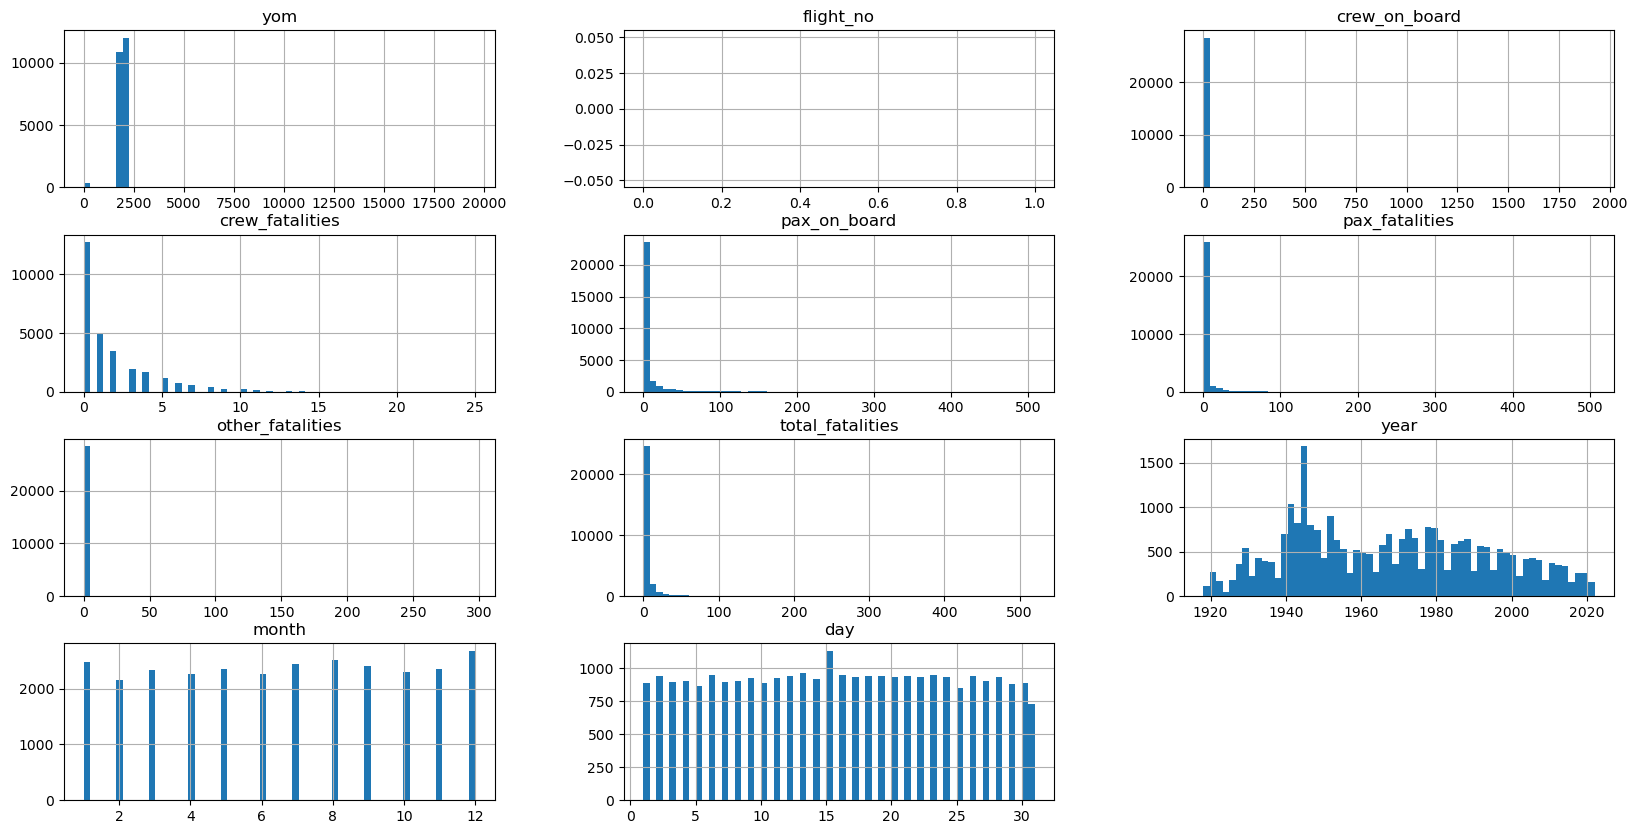

In [40]:
avioset.hist(figsize=(20,10), bins=60)

array([[<Axes: title={'center': 'yom'}>,
        <Axes: title={'center': 'flight_no'}>,
        <Axes: title={'center': 'crew_on_board'}>],
       [<Axes: title={'center': 'crew_fatalities'}>,
        <Axes: title={'center': 'pax_on_board'}>,
        <Axes: title={'center': 'pax_fatalities'}>],
       [<Axes: title={'center': 'other_fatalities'}>,
        <Axes: title={'center': 'total_fatalities'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>, <Axes: >]], dtype=object)

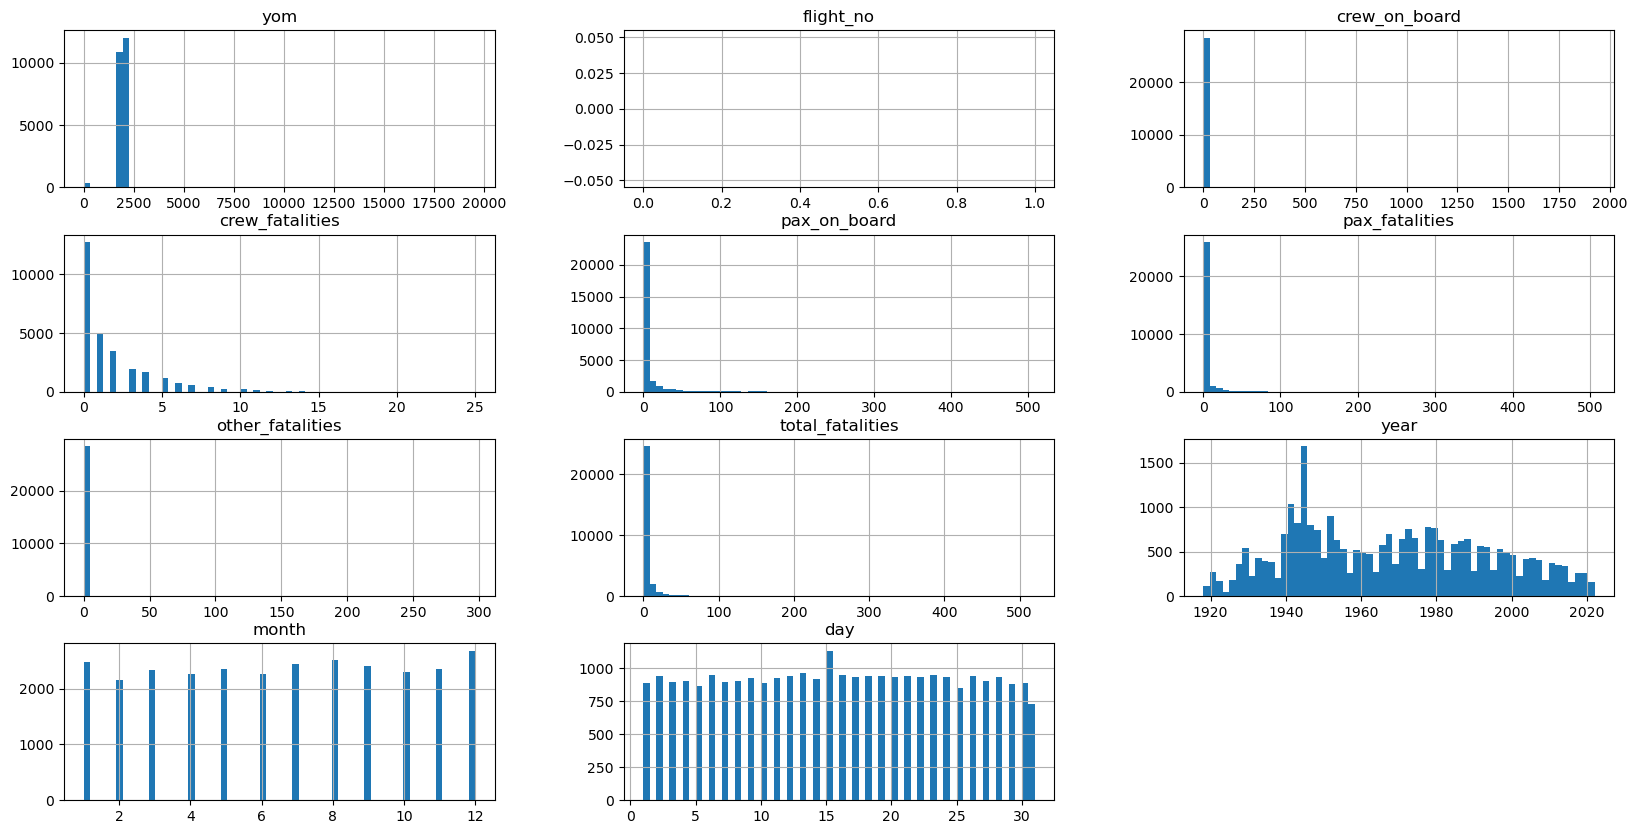

In [41]:
avioset.hist(figsize=(20,10), bins=60)